This notebook contains derivation of BCs, IC and g for example based on

Kučera, V. (n.d.). Higher order methods for the solution of compressible flows. Charles University. Retrieved from http://www.ncbi.nlm.nih.gov/pubmed/21188320, p. 21 eq. (1.39)

### Solution

In [1]:
var("x_1, x_2, t, u")
# solution is
u(x_1, x_2, t) = (sin(4*(x_1 + x_2 - x_1 * x_2)) + sin(5*x_1*x_2))*(1 - exp(-t))
u

(x_1, x_2, t) |--> -(e^(-t) - 1)*(sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))

In [2]:
du_1 = diff(u, x_1)
du_1

(x_1, x_2, t) |--> -(5*x_2*cos(5*x_1*x_2) - 4*(x_2 - 1)*cos(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)

In [3]:
du_2 = diff(u, x_2)
du_2

(x_1, x_2, t) |--> -(5*x_1*cos(5*x_1*x_2) - 4*(x_1 - 1)*cos(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)

### Initial condition

In [4]:
u(t=0)

0

### Boundary conditions

In [5]:
# boundaries
top = 1
left = -1; right = 1
bottom = -1

In [6]:
# left
u(x_1 = left)

-(e^(-t) - 1)*(sin(-5*x_2) + sin(8*x_2 - 4))

In [7]:
# left du
(du_1(x_1=left), du_2(x_1=left))

(-(5*x_2*cos(-5*x_2) - 4*(x_2 - 1)*cos(8*x_2 - 4))*(e^(-t) - 1),
 (5*cos(-5*x_2) - 8*cos(8*x_2 - 4))*(e^(-t) - 1))

In [8]:
# right
u(x_1 = right)

-(e^(-t) - 1)*(sin(4) + sin(5*x_2))

In [9]:
# right du
(du_1(x_1=right), du_2(x_1=right))

((4*(x_2 - 1)*cos(4) - 5*x_2*cos(5*x_2))*(e^(-t) - 1),
 -5*(e^(-t) - 1)*cos(5*x_2))

In [10]:
# bottom
u(x_2 = bottom)

-(e^(-t) - 1)*(sin(-5*x_1) + sin(8*x_1 - 4))

In [11]:
# bottom du
(du_1(x_2=bottom), du_2(x_2=bottom))

((5*cos(-5*x_1) - 8*cos(8*x_1 - 4))*(e^(-t) - 1),
 -(5*x_1*cos(-5*x_1) - 4*(x_1 - 1)*cos(8*x_1 - 4))*(e^(-t) - 1))

In [12]:
# top
u(x_2 = top)

-(e^(-t) - 1)*(sin(4) + sin(5*x_1))

In [13]:
# top du
(du_1(x_2=top), du_2(x_2=top))

(-5*(e^(-t) - 1)*cos(5*x_1),
 (4*(x_1 - 1)*cos(4) - 5*x_1*cos(5*x_1))*(e^(-t) - 1))

### Right hand side $g$

In [14]:
diff(u, t)

(x_1, x_2, t) |--> (sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))*e^(-t)

In [15]:
var("eps")

eps

In [16]:
diff(u, x_1)

(x_1, x_2, t) |--> -(5*x_2*cos(5*x_1*x_2) - 4*(x_2 - 1)*cos(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)

In [17]:
diff(u, x_1, 2)

(x_1, x_2, t) |--> (25*x_2^2*sin(5*x_1*x_2) + 16*(x_2 - 1)^2*sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)

In [18]:
assume(-1 < x_1 < 1)
assume(-1 < x_2 < 1)
g = diff(u, t) + 1/2*(diff(u**2, x_1) + diff(u**2, x_2)) - eps * (diff(u, x_1, 2) + diff(u, x_2, 2))
g

(x_1, x_2, t) |--> (5*x_1*cos(5*x_1*x_2) - 4*(x_1 - 1)*cos(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)^2*(sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2)) + (5*x_2*cos(5*x_1*x_2) - 4*(x_2 - 1)*cos(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1)^2*(sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2)) - ((25*x_1^2*sin(5*x_1*x_2) + 16*(x_1 - 1)^2*sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1) + (25*x_2^2*sin(5*x_1*x_2) + 16*(x_2 - 1)^2*sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))*(e^(-t) - 1))*eps + (sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2))*e^(-t)

In [19]:
simplify(g)

(x_1, x_2, t) |--> (5*x_1*cos(5*x_1*x_2) - 4*(x_1 - 1)*cos(4*x_1*x_2 - 4*x_1 - 4*x_2))*(e^(-t) - 1)^2*(sin(5*x_1*x_2) - sin(4*x_1*x_2 - 4*x_1 - 4*x_2)) + (5*x_2*cos(5*x_1*x_2) - 4*(x_2 - 1)*cos(4*x_1*x_2 - 4*x_1 - 4*x_2))*(e^(-t) - 1)^2*(sin(5*x_1*x_2) - sin(4*x_1*x_2 - 4*x_1 - 4*x_2)) - ((25*x_1^2*sin(5*x_1*x_2) - 16*(x_1 - 1)^2*sin(4*x_1*x_2 - 4*x_1 - 4*x_2))*(e^(-t) - 1) + (25*x_2^2*sin(5*x_1*x_2) - 16*(x_2 - 1)^2*sin(4*x_1*x_2 - 4*x_1 - 4*x_2))*(e^(-t) - 1))*eps + (sin(5*x_1*x_2) - sin(4*x_1*x_2 - 4*x_1 - 4*x_2))*e^(-t)

In [20]:
latex(g)

\left( x_{1}, x_{2}, t \right) \ {\mapsto} \ {\left(5 \, x_{1} \cos\left(5 \, x_{1} x_{2}\right) - 4 \, {\left(x_{1} - 1\right)} \cos\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)}^{2} {\left(\sin\left(5 \, x_{1} x_{2}\right) + \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} + {\left(5 \, x_{2} \cos\left(5 \, x_{1} x_{2}\right) - 4 \, {\left(x_{2} - 1\right)} \cos\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)}^{2} {\left(\sin\left(5 \, x_{1} x_{2}\right) + \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} - {\left({\left(25 \, x_{1}^{2} \sin\left(5 \, x_{1} x_{2}\right) + 16 \, {\left(x_{1} - 1\right)}^{2} \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)} + {\left(25 \, x_{2}^{2} \sin\left(5 \, x_{1} x_{2}\right) + 16 \, {\left(x_{2} - 1\right)}^{2} \sin\left(-4 \, x_{1} x_{2} + 

$$
\left( x_{1}, x_{2}, t \right) \ {\mapsto} \ {\left(5 \, x_{1} \cos\left(5 \, x_{1} x_{2}\right) - 4 \, {\left(x_{1} - 1\right)} \cos\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)}^{2} {\left(\sin\left(5 \, x_{1} x_{2}\right) + \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} + {\left(5 \, x_{2} \cos\left(5 \, x_{1} x_{2}\right) - 4 \, {\left(x_{2} - 1\right)} \cos\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)}^{2} {\left(\sin\left(5 \, x_{1} x_{2}\right) + \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} - {\left({\left(25 \, x_{1}^{2} \sin\left(5 \, x_{1} x_{2}\right) + 16 \, {\left(x_{1} - 1\right)}^{2} \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)} + {\left(25 \, x_{2}^{2} \sin\left(5 \, x_{1} x_{2}\right) + 16 \, {\left(x_{2} - 1\right)}^{2} \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} {\left(e^{\left(-t\right)} - 1\right)}\right)} \mathit{eps} + {\left(\sin\left(5 \, x_{1} x_{2}\right) + \sin\left(-4 \, x_{1} x_{2} + 4 \, x_{1} + 4 \, x_{2}\right)\right)} e^{\left(-t\right)}
$$

In [21]:
g(t=0)

sin(5*x_1*x_2) + sin(-4*x_1*x_2 + 4*x_1 + 4*x_2)

In [22]:
g.simplify_trig()

(x_1, x_2, t) |--> (4*x_2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)*sin(4*x_1) - 8*(x_2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)*sin(4*x_1) + (x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)*sin(4*x_1))*cos(4*x_2)^2 - 8*(x_2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)*sin(4*x_1) - 2*(x_2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)*sin(4*x_1) + (x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)*sin(4*x_1))*cos(4*x_2)^2 + (x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)*sin(4*x_1) - (2*(x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)^2 + (2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)^2 - e^(2*t) + 2*e^t - 1)*x_2 - x_1*(e^(2*t) - 2*e^t + 1) + 2*e^(2*t) - 4*e^t + 2)*cos(4*x_2)*sin(4*x_2))*sin(4*x_1*x_2)^2 + 4*(x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)*sin(4*x_1) - 4*(2*(x_1*(e^(2*t) - 2*e^t + 1) - 2*e^(2*t) + 4*e^t - 2)*cos(4*x_1)^2 + (2*(e^(2*t) - 2*e^t + 1)*cos(4*x_1)^2 - e^(2*t) + 2*e^t - 1)*x_2 - x_1*(e^(2*t) - 2*e^t + 1) + 2*e^(2*t) - 4*e^t + 2)*cos(4*x_2)*sin(

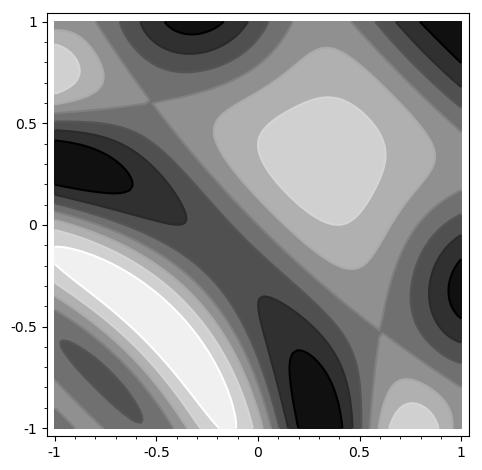

In [23]:
contour_plot(g(t=0, eps=0.002), (x_1, -1,1), (x_2, -1,1))

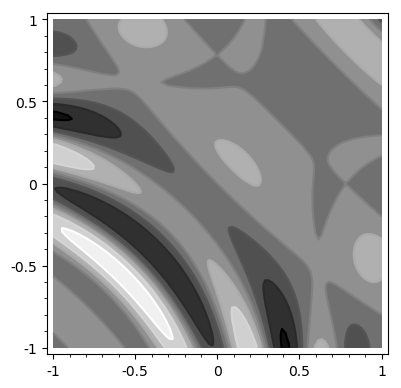

In [26]:
contour_plot(g(t=1, eps=0.002), (x_1, -1,1), (x_2, -1,1))

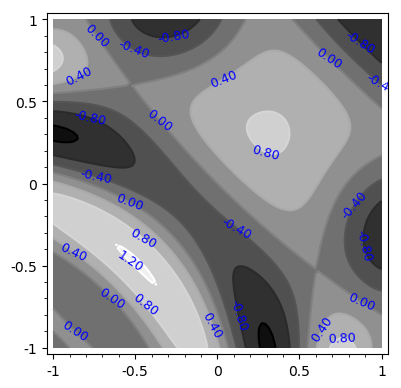

In [29]:
contour_plot(u(t=1) , (x_1, -1,1), (x_2, -1,1), labels=True)

In [30]:
plot3d(u(t=1), (x_1, -1,1), (x_2, -1,1))

Graphics3d Object